# **Loading the Libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

In [ ]:
df = pd.read_csv("/content/explored_data.csv")
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


# **Data Cleaning**

## **Handle Missing Values**

In [ ]:
df.isnull().sum()

,0
cust_id,0
number_of_open_accounts,0
number_of_closed_accounts,0
total_loan_months,0
delinquent_months,0
total_dpd,0
enquiry_count,0
credit_utilization_ratio,0
age,0
gender,0


In [ ]:
df['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [ ]:
(52 / df.shape[0]) * 100

0.104

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

,0
cust_id,0
number_of_open_accounts,0
number_of_closed_accounts,0
total_loan_months,0
delinquent_months,0
total_dpd,0
enquiry_count,0
credit_utilization_ratio,0
age,0
gender,0


In [ ]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [ ]:
df.shape

(49938, 32)

## **Check is there any Data Inconsistency or Inappropriate values**

In [ ]:
cat_cols = ['gender', 'marital_status', 'employment_status', 'residence_type', 'loan_purpose', 'loan_type', 'default']

for column in cat_cols:
  print(f"For {column}: {df[column].unique()}\n")

For gender: ['M' 'F']

For marital_status: ['Married' 'Single']

For employment_status: ['Self-Employed' 'Salaried']

For residence_type: ['Owned' 'Mortgage' 'Rented']

For loan_purpose: ['Auto' 'Home' 'Personal' 'Education' 'Personaal']

For loan_type: ['Secured' 'Unsecured']

For default: [False  True]



In [ ]:
df['loan_purpose']=df['loan_purpose'].replace({'Personaal': 'Personal'})

for column in cat_cols:
  print(f"For {column}: {df[column].unique()}\n")

For gender: ['M' 'F']

For marital_status: ['Married' 'Single']

For employment_status: ['Self-Employed' 'Salaried']

For residence_type: ['Owned' 'Mortgage' 'Rented']

For loan_purpose: ['Auto' 'Home' 'Personal' 'Education']

For loan_type: ['Secured' 'Unsecured']

For default: [False  True]



## **Correct Data Types**

In [ ]:
df.dtypes

,0
cust_id,object
number_of_open_accounts,int64
number_of_closed_accounts,int64
total_loan_months,int64
delinquent_months,int64
total_dpd,int64
enquiry_count,int64
credit_utilization_ratio,int64
age,int64
gender,object


In [ ]:
df['zipcode'] = df['zipcode'].astype(str)  # Converts to string
df.dtypes

,0
cust_id,object
number_of_open_accounts,int64
number_of_closed_accounts,int64
total_loan_months,int64
delinquent_months,int64
total_dpd,int64
enquiry_count,int64
credit_utilization_ratio,int64
age,int64
gender,object


In [ ]:
# Convert to datetime and extract the date
df['disbursal_date'] = pd.to_datetime(df['disbursal_date'])
df['installment_start_dt'] = pd.to_datetime(df['installment_start_dt'])

df.dtypes

,0
cust_id,object
number_of_open_accounts,int64
number_of_closed_accounts,int64
total_loan_months,int64
delinquent_months,int64
total_dpd,int64
enquiry_count,int64
credit_utilization_ratio,int64
age,int64
gender,object


In [ ]:
df['disbursal_date'].dt.year

,disbursal_date
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
49995,2024
49996,2024
49997,2024
49998,2024


In [ ]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


## **Check for Duplicates**

In [ ]:
df.duplicated().sum()

0

## **Outlier Handling**

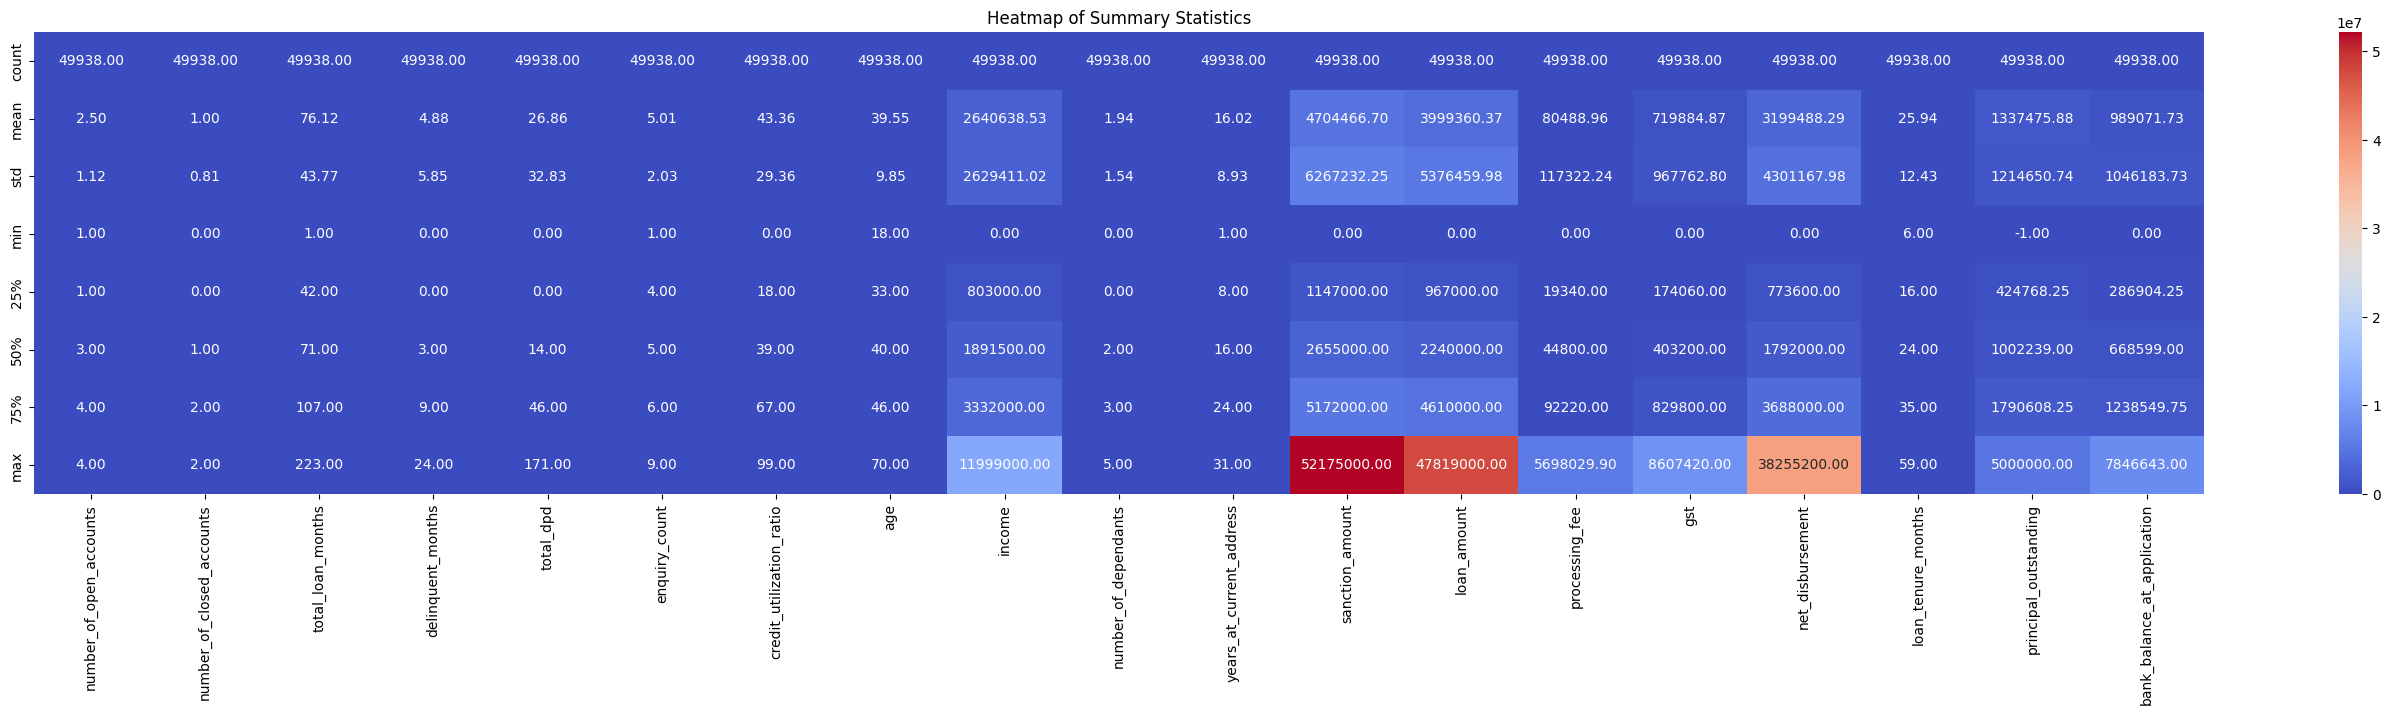

In [ ]:
# Filter for numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Generate summary statistics
summary_stats = numeric_data.describe()

# Plot the heatmap
plt.figure(figsize=(35, 6))  # Adjust the size as needed
sns.heatmap(summary_stats, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Heatmap of Summary Statistics")
plt.show()

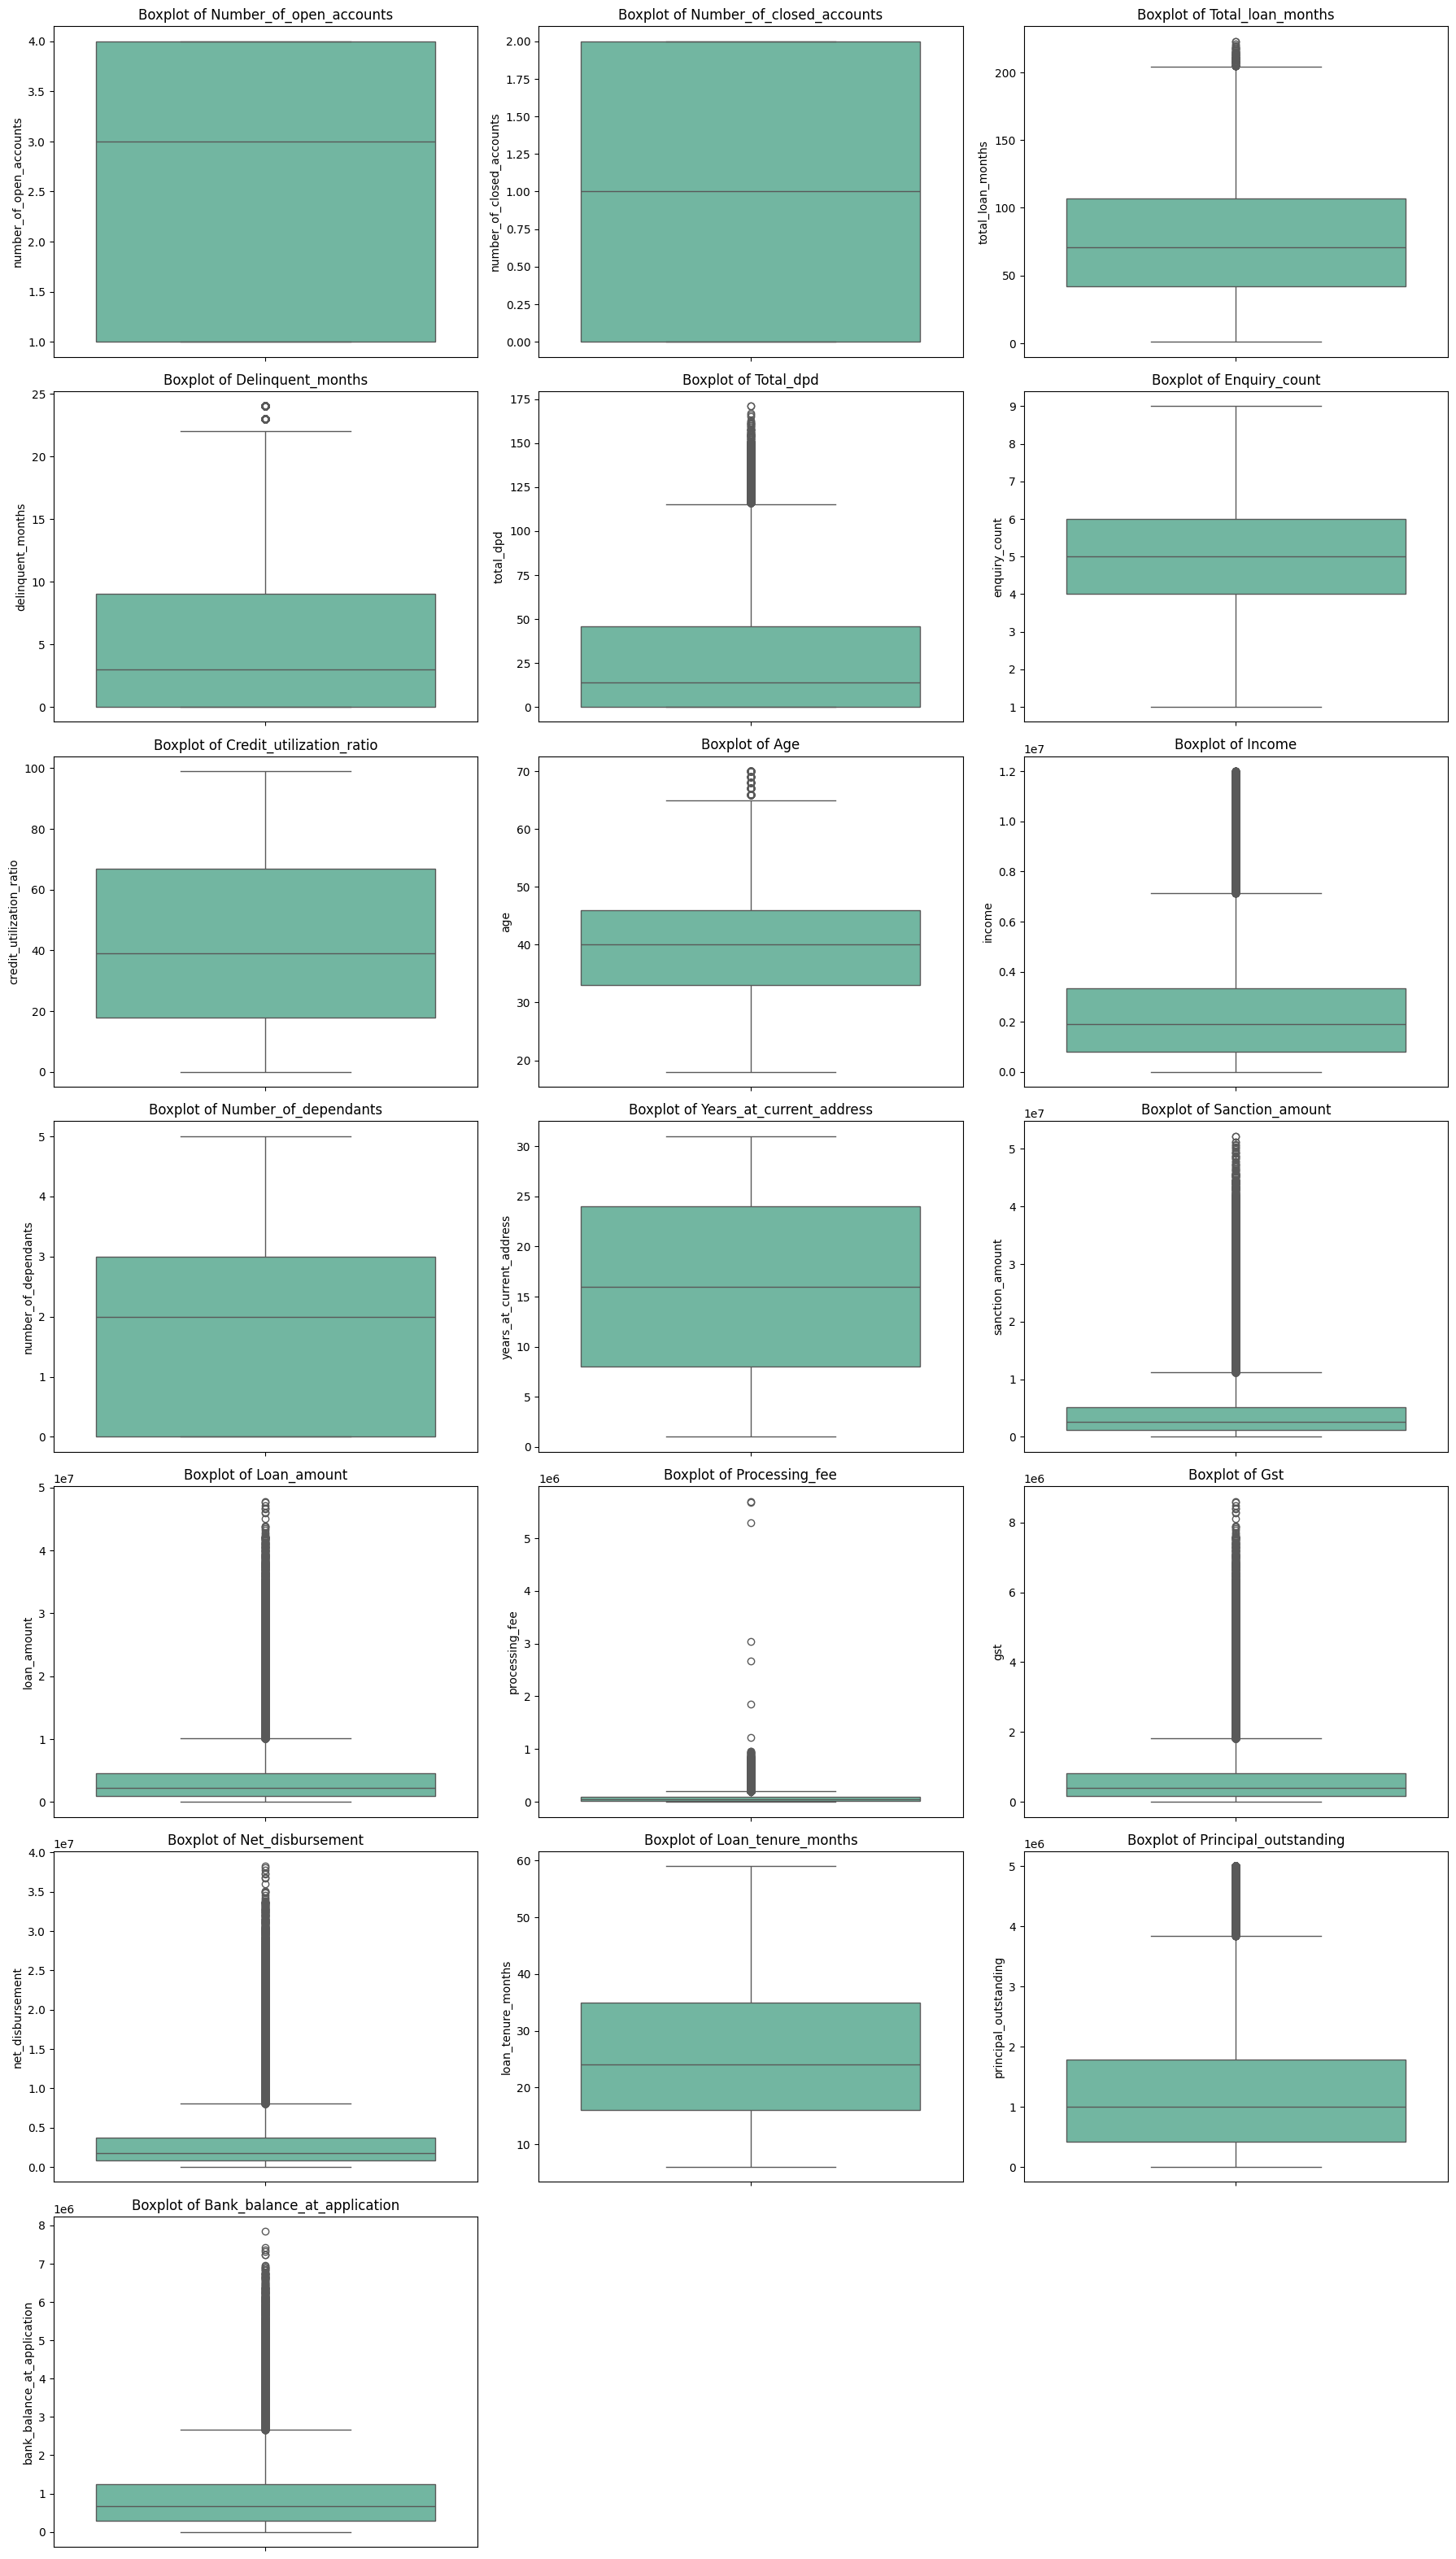

In [ ]:
# List of numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(8, 3, figsize=(18, 36))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 3x3 grid for easier indexing

# Plot each numeric column
for i, column in enumerate(num_cols):
    sns.boxplot(data=df, y=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Boxplot of {column.capitalize()}")

# Remove empty subplots (if any)
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df['age'].quantile([0.25, 0.75])

,age
0.25,33.0
0.75,46.0


In [ ]:
def iqr(column):
  """
    Calculate the Interquartile Range (IQR) and determine the lower and upper bounds for outlier detection.

    Parameters:
    column (str): The name of the column in the DataFrame for which the IQR and bounds are calculated.

    Returns:
    None: Prints the lower and upper bounds for the column.

  """
  q1, q3 = df[column].quantile([0.25, 0.75])
  IQR = q3 - q1
  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)
  print(f"Lower Bound: {lower_bound} and Upper Bound: {upper_bound}\n")

In [ ]:
for column in num_cols:
  print(f"For {column}: {iqr(column)}")

Lower Bound: -3.5 and Upper Bound: 8.5

For number_of_open_accounts: None
Lower Bound: -3.0 and Upper Bound: 5.0

For number_of_closed_accounts: None
Lower Bound: -55.5 and Upper Bound: 204.5

For total_loan_months: None
Lower Bound: -13.5 and Upper Bound: 22.5

For delinquent_months: None
Lower Bound: -69.0 and Upper Bound: 115.0

For total_dpd: None
Lower Bound: 1.0 and Upper Bound: 9.0

For enquiry_count: None
Lower Bound: -55.5 and Upper Bound: 140.5

For credit_utilization_ratio: None
Lower Bound: 13.5 and Upper Bound: 65.5

For age: None
Lower Bound: -2990500.0 and Upper Bound: 7125500.0

For income: None
Lower Bound: -4.5 and Upper Bound: 7.5

For number_of_dependants: None
Lower Bound: -16.0 and Upper Bound: 48.0

For years_at_current_address: None
Lower Bound: -4890500.0 and Upper Bound: 11209500.0

For sanction_amount: None
Lower Bound: -4497500.0 and Upper Bound: 10074500.0

For loan_amount: None
Lower Bound: -89980.0 and Upper Bound: 201540.0

For processing_fee: None
Lower

In [ ]:
df.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [ ]:
np.round(df['income'].describe(), 2)

,income
count,49938.00
mean,2640638.53
std,2629411.02
min,0.00
25%,803000.00
50%,1891500.00
75%,3332000.00
max,11999000.00


In [ ]:
df['income'].quantile(0.99)

11459000.0

In [ ]:
df = df[df['income'] <= df['income'].quantile(0.99)]
np.round(df['income'].describe(), 2)

,income
count,49439.00
mean,2548857.50
std,2477966.54
min,0.00
25%,796000.00
50%,1868000.00
75%,3283000.00
max,11459000.00


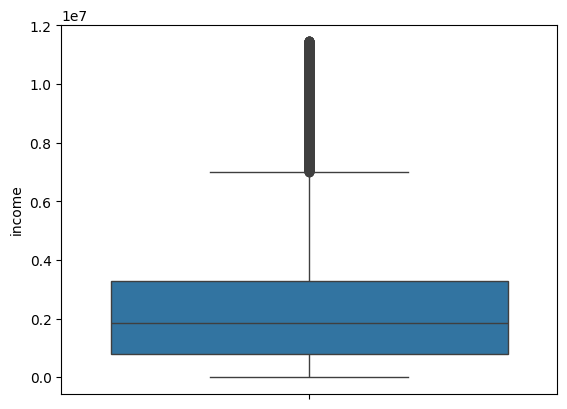

In [ ]:
sns.boxplot(data = df, y = 'income');

In [ ]:
df.shape

(49439, 32)

In [ ]:
df['diff'] = df['loan_amount'] - df['processing_fee']
df['pct'] = (df['processing_fee'] / df['loan_amount']) * 100
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,diff,pct
0,C00001,1,1,42,0,0,3,7,44,M,...,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False,2417660.0,2.0
1,C00002,3,1,96,12,60,5,4,38,M,...,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False,3805340.0,2.0
2,C00003,2,1,82,24,147,6,58,46,F,...,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False,2126600.0,2.0
3,C00004,3,0,115,15,87,5,26,55,F,...,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False,1712060.0,2.0
4,C00005,4,2,120,0,0,5,10,37,M,...,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False,4429600.0,2.0


In [ ]:
df[df['diff'] < 0].shape[0]

7

In [ ]:
np.round(df[['loan_amount', 'processing_fee', 'diff', 'pct']].describe(), 2)

,loan_amount,processing_fee,diff,pct
count,49439.00,49439.00,49439.00,49431.00
mean,3875197.58,78010.77,3797186.81,2.02
std,5079877.02,112021.33,4978555.18,1.49
min,0.00,0.00,-1866020.86,2.00
25%,957000.00,19140.00,936880.00,2.00
50%,2210000.00,44200.00,2164820.00,2.00
75%,4549000.00,91000.00,4457530.00,2.00
max,47173000.00,5698029.90,46229540.00,148.95


In [ ]:
df = df[df['diff'] > 0]
np.round(df[['loan_amount', 'processing_fee', 'diff', 'pct']].describe(), 2)

,loan_amount,processing_fee,diff,pct
count,49424.00,49424.00,49424.00,49424.0
mean,3875976.49,77519.53,3798456.96,2.0
std,5080372.78,101607.46,4978765.33,0.0
min,50000.00,1000.00,49000.00,2.0
25%,957000.00,19140.00,937860.00,2.0
50%,2210000.00,44200.00,2165800.00,2.0
75%,4550000.00,91000.00,4459000.00,2.0
max,47173000.00,943460.00,46229540.00,2.0


In [ ]:
df.drop(['diff', 'pct'], axis = 1, inplace = True)
df.shape

(49424, 32)

In [ ]:
df['diff'] = df['sanction_amount'] - df['loan_amount']
df[df['diff'] < 0].shape[0]

0

In [ ]:
df.drop('diff', axis = 1, inplace = True)
df.shape

(49424, 32)

In [ ]:
# Define thresholds and conditions
df['valid_gst'] = df['gst'] <= (df['loan_amount'] * 0.20)  # Assuming 20% GST rate
df['valid_net_disbursement'] = df['net_disbursement'] <= (df['loan_amount'] - df['gst'])
df['valid_principal_outstanding'] = df['principal_outstanding'] <= df['loan_amount']
df['valid_bank_balance'] = df['bank_balance_at_application'] >= 0

# Combine all validations
df['valid_loan'] = df[['valid_gst', 'valid_net_disbursement', 'valid_principal_outstanding', 'valid_bank_balance']].all(axis=1)

# View invalid records
invalid_records = df[~df['valid_loan']]
print(f"Number of invalid loan records: {len(invalid_records)}")

Number of invalid loan records: 0


In [ ]:
df.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,valid_gst,valid_net_disbursement,valid_principal_outstanding,valid_bank_balance,valid_loan
0,C00001,1,1,42,0,0,3,7,44,M,...,1630408,873386,2019-07-24,2019-08-10,False,True,True,True,True,True
1,C00002,3,1,96,12,60,5,4,38,M,...,709309,464100,2019-07-24,2019-08-15,False,True,True,True,True,True
2,C00003,2,1,82,24,147,6,58,46,F,...,1562399,1476042,2019-07-24,2019-08-21,False,True,True,True,True,True


In [ ]:
df = df.drop(df.columns[-5:], axis=1)

df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


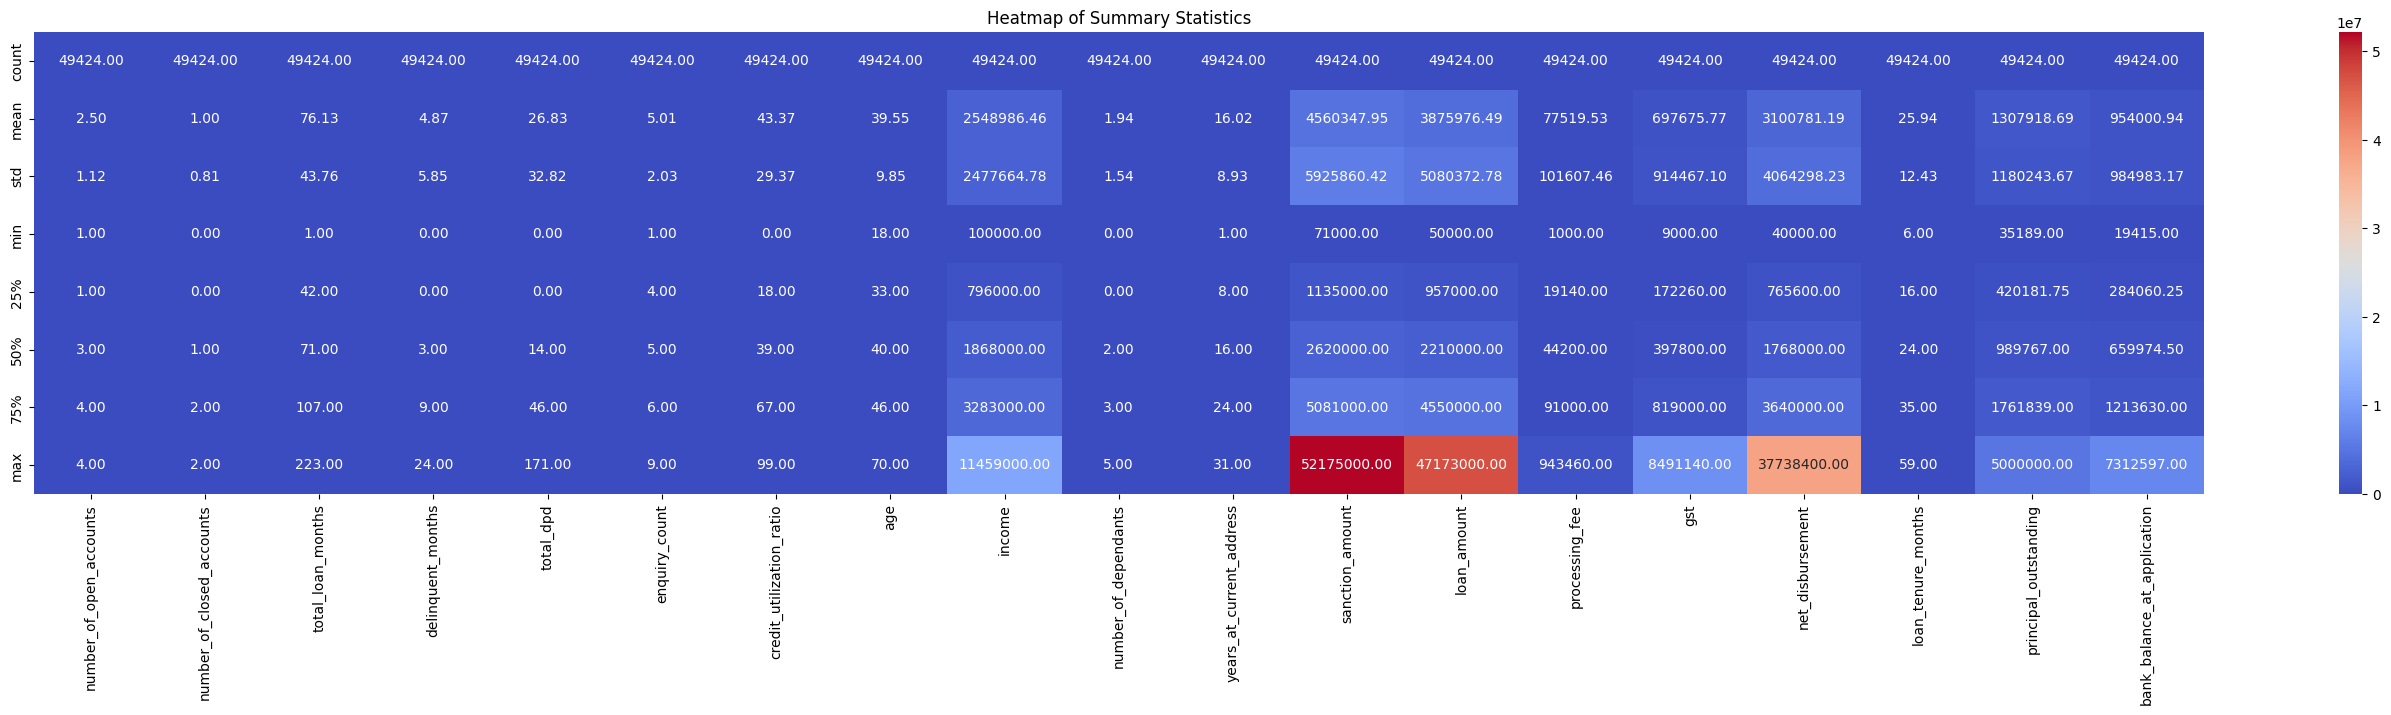

In [ ]:
# Filter for numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Generate summary statistics
summary_stats = numeric_data.describe()

# Plot the heatmap
plt.figure(figsize=(35, 6))  # Adjust the size as needed
sns.heatmap(summary_stats, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Heatmap of Summary Statistics")
plt.show()

In [ ]:
df.shape

(49424, 32)

In [ ]:
df.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_purpose',
       'loan_type', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default'],
      dtype='object')

# **Exploratory Data Analysis**

## **Univariate Analysis**

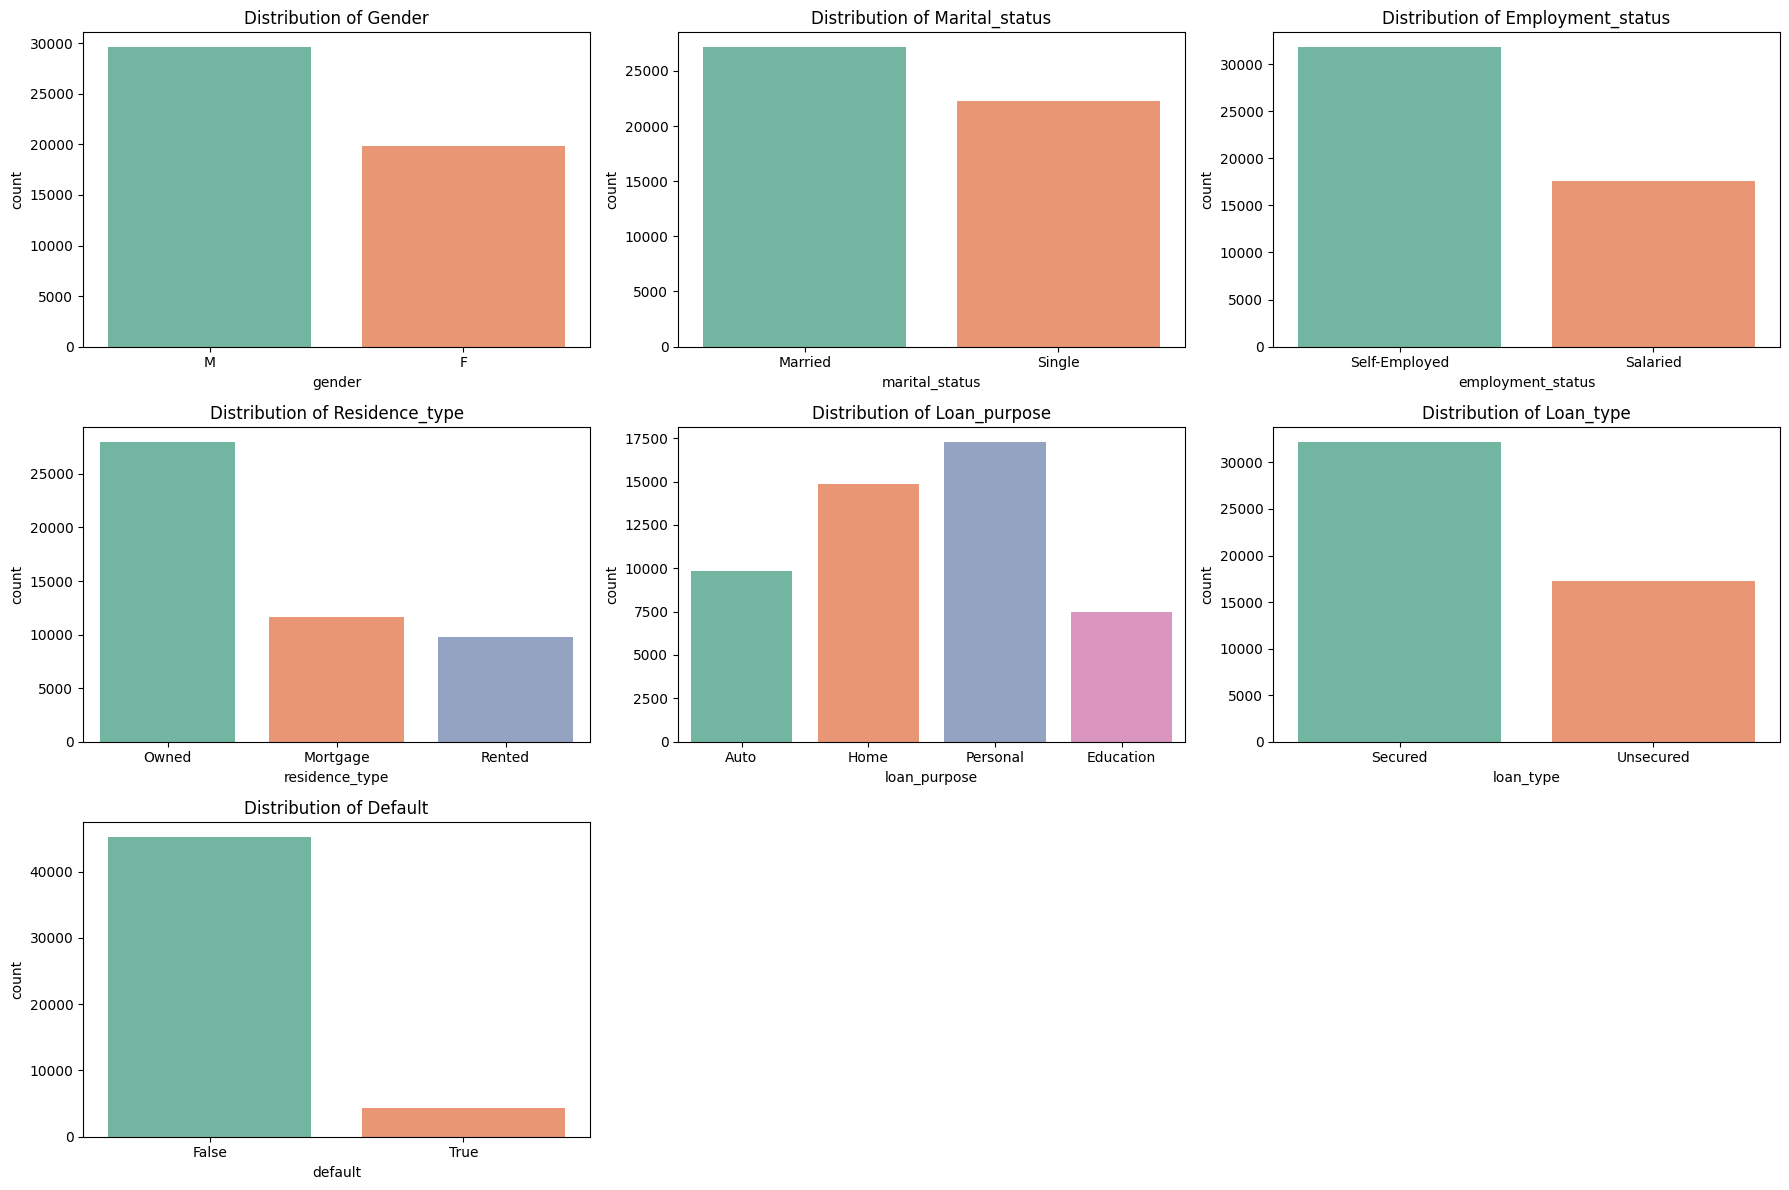

In [ ]:
cat_cols = ['gender', 'marital_status', 'employment_status', 'residence_type', 'loan_purpose', 'loan_type', 'default']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(cat_cols):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Distribution of {column.capitalize()}")

# Remove empty subplots (if any)
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

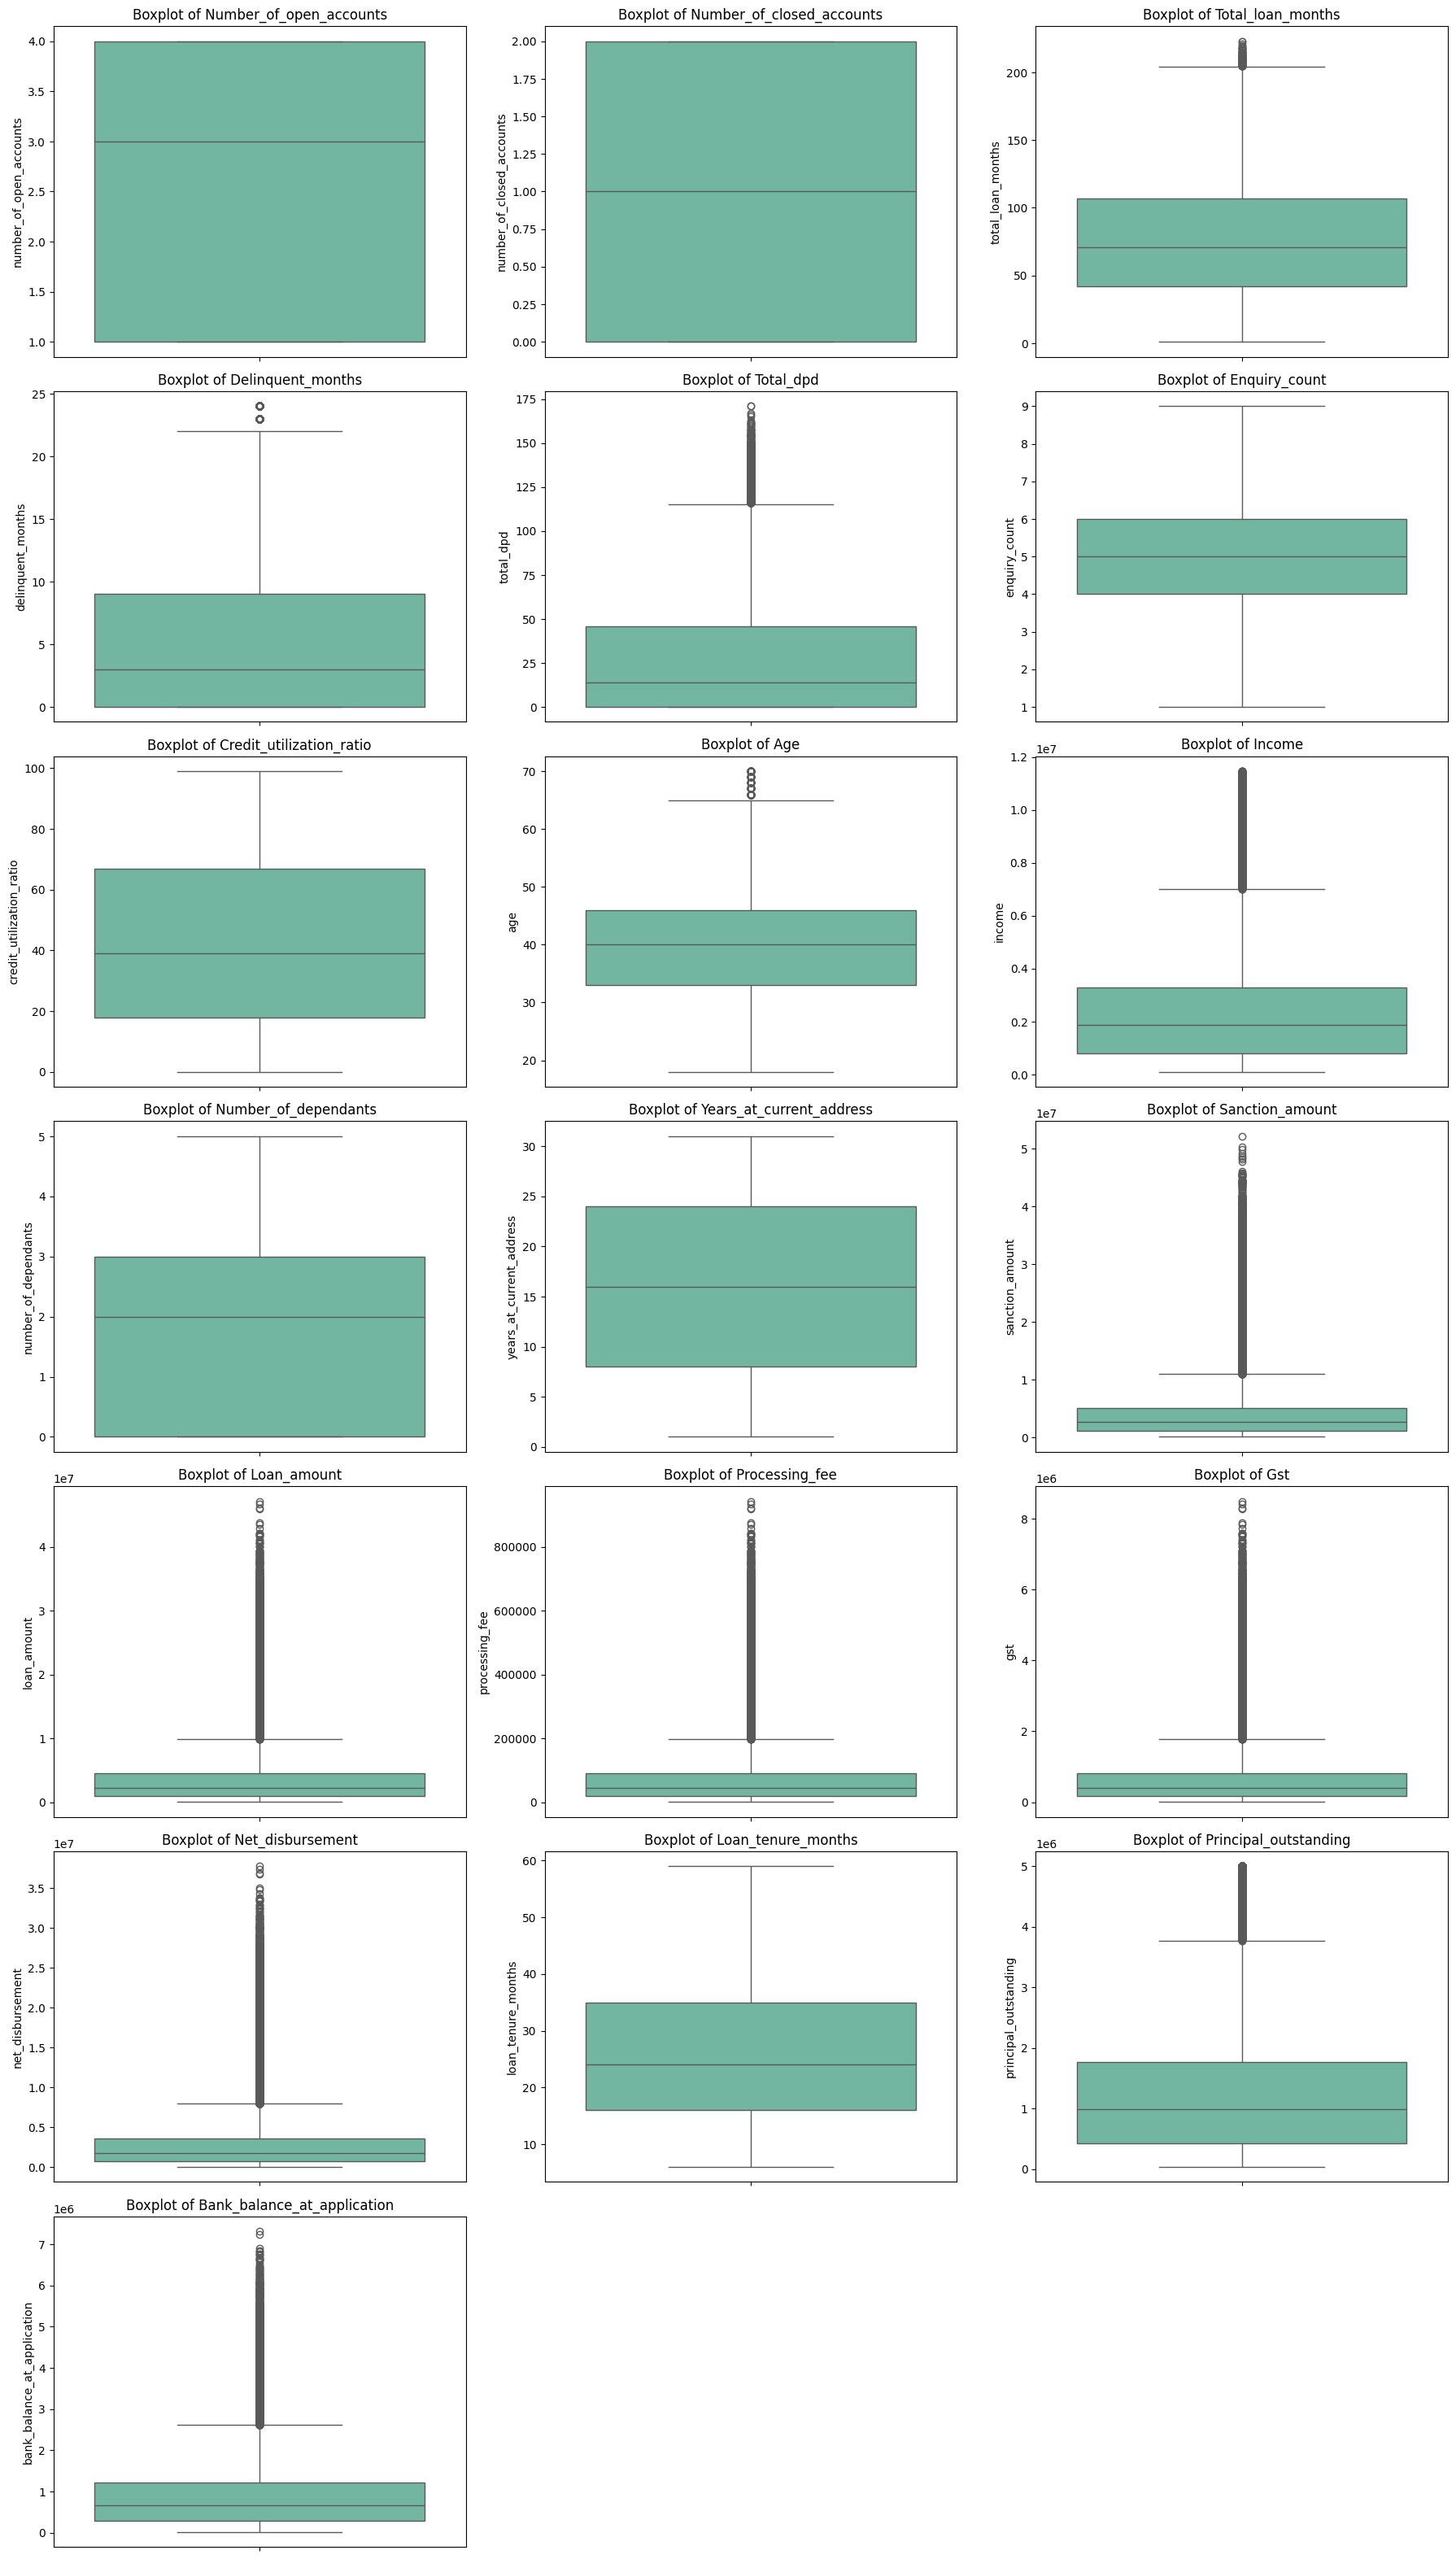

In [ ]:
# List of numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Create a 3x3 grid for subplots
fig, axes = plt.subplots(8, 3, figsize=(18, 36))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 3x3 grid for easier indexing

# Plot each numeric column
for i, column in enumerate(num_cols):
    sns.boxplot(data=df, y=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Boxplot of {column.capitalize()}")

# Remove empty subplots (if any)
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## **Bivariate Analysis**

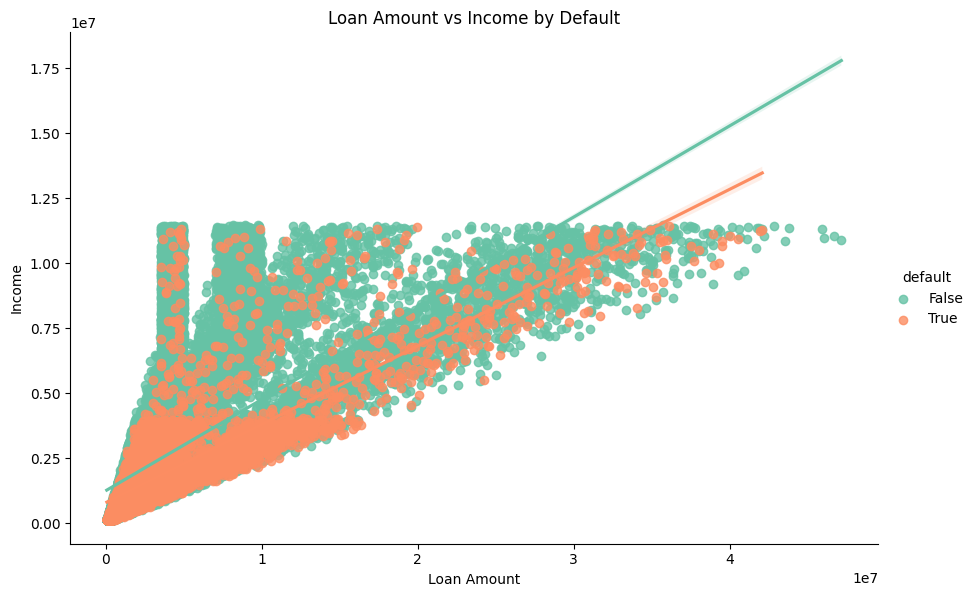

In [ ]:
sns.lmplot(data=df, x='loan_amount', y='income', hue='default', palette='Set2', height=6, aspect=1.5)
plt.title('Loan Amount vs Income by Default')
plt.xlabel('Loan Amount')
plt.ylabel('Income')
plt.show()

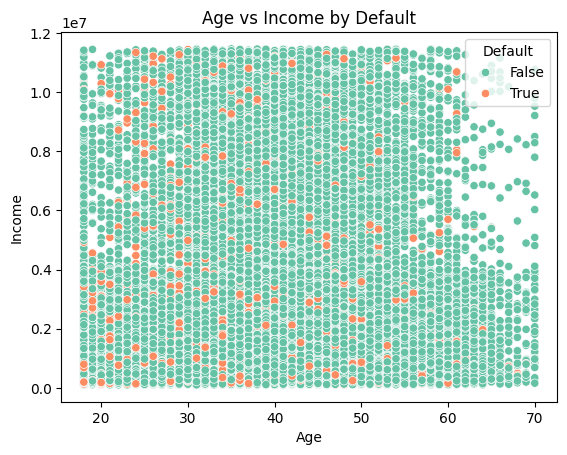

In [ ]:
sns.scatterplot(data=df, x='age', y='income', hue='default', palette='Set2')
plt.title('Age vs Income by Default')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Default')
plt.show()

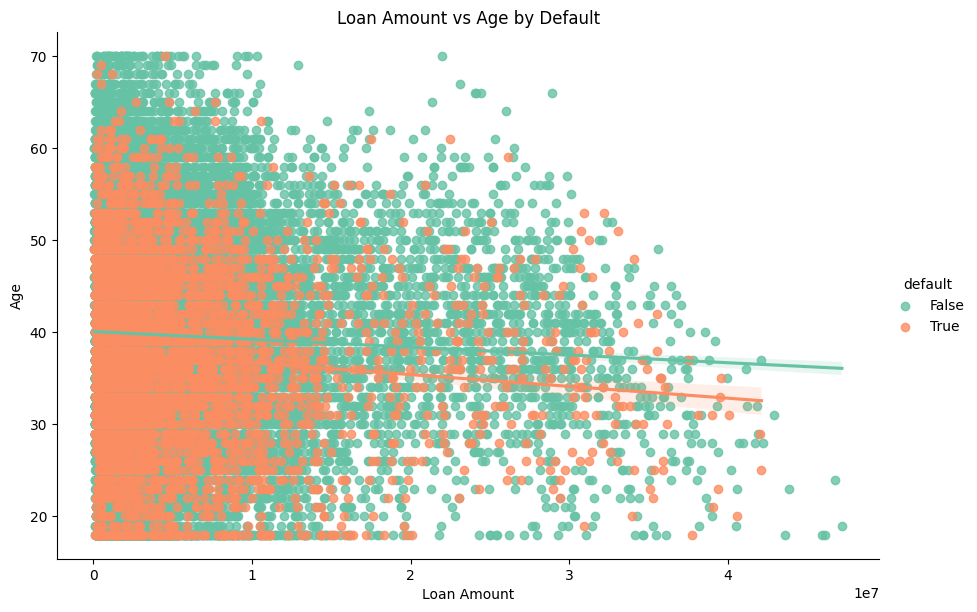

In [ ]:
sns.lmplot(data=df, x='loan_amount', y='age', hue='default', palette='Set2', height=6, aspect=1.5)
plt.title('Loan Amount vs Age by Default')
plt.xlabel('Loan Amount')
plt.ylabel('Age')
plt.show()

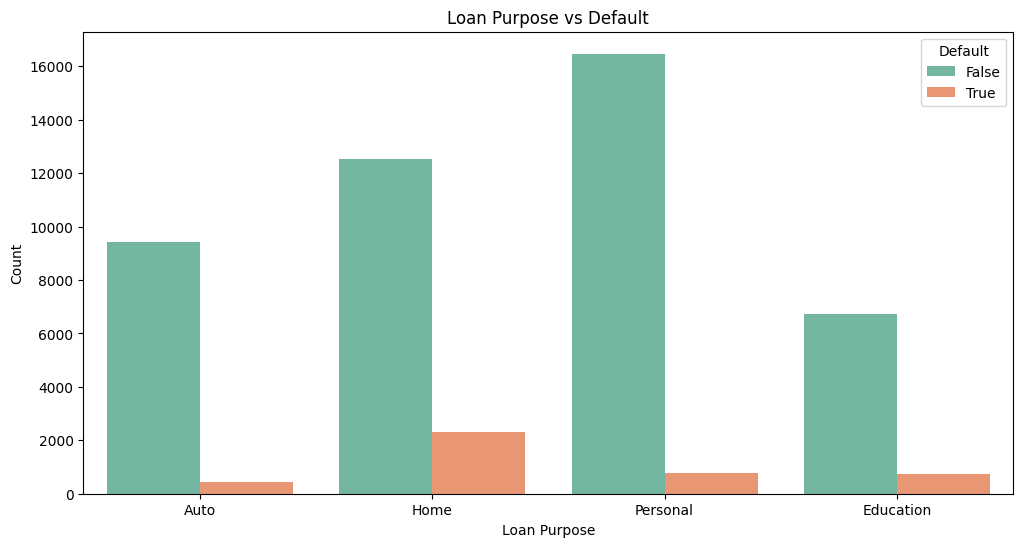

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_purpose', hue='default', palette='Set2')
plt.title('Loan Purpose vs Default')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.legend(title='Default')
plt.xticks(rotation=0)
plt.show()

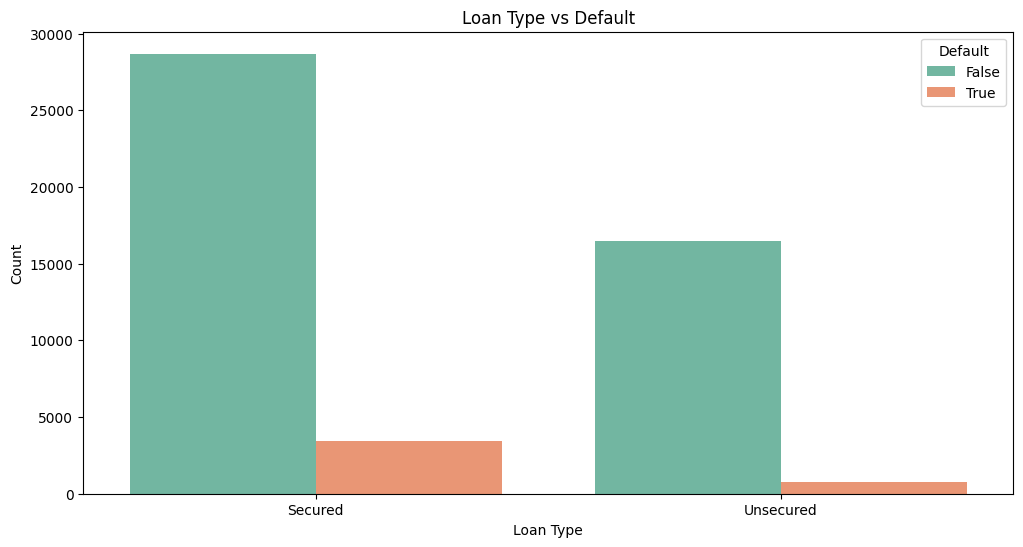

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_type', hue='default', palette='Set2')
plt.title('Loan Type vs Default')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.legend(title='Default')
plt.xticks(rotation=0)
plt.show()

default            False  True 
employment_status              
Salaried            0.91   0.09
Self-Employed       0.92   0.08


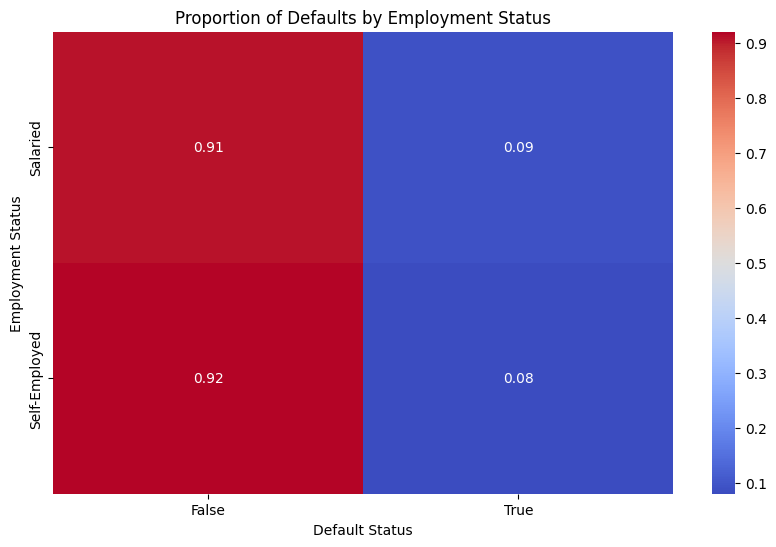

In [ ]:
crosstab = np.round(pd.crosstab(df['employment_status'], df['default'], normalize='index'), 2)  # Proportions by loan purpose
print(crosstab)

# Heatmap for cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='coolwarm', cbar=True)
plt.title('Proportion of Defaults by Employment Status')
plt.ylabel('Employment Status')
plt.xlabel('Default Status')
plt.show()

default         False  True 
marital_status              
Married          0.92   0.08
Single           0.91   0.09


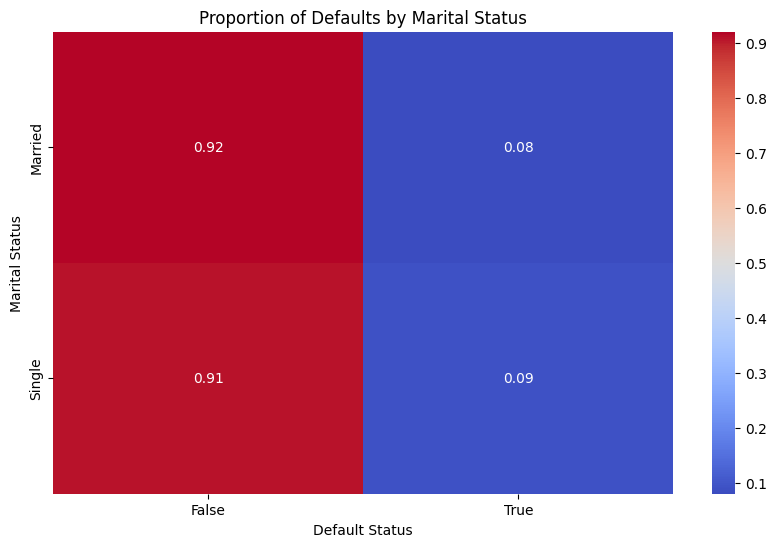

In [ ]:
crosstab = np.round(pd.crosstab(df['marital_status'], df['default'], normalize='index'), 2)  # Proportions by loan purpose
print(crosstab)

# Heatmap for cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='coolwarm', cbar=True)
plt.title('Proportion of Defaults by Marital Status')
plt.ylabel('Marital Status')
plt.xlabel('Default Status')
plt.show()

In [ ]:
# Group the data
grouped_data = df.groupby(['city', 'state', 'zipcode', 'default'])['default'].count().reset_index(name='count')

grouped_data

,city,state,zipcode,default,count
0,Ahmedabad,Gujarat,380001,False,4491
1,Ahmedabad,Gujarat,380001,True,436
2,Bangalore,Karnataka,560001,False,4524
3,Bangalore,Karnataka,560001,True,429
4,Chennai,Tamil Nadu,600001,False,4503
5,Chennai,Tamil Nadu,600001,True,418
6,Delhi,Delhi,110001,False,4475
7,Delhi,Delhi,110001,True,417
8,Hyderabad,Telangana,500001,False,4560
9,Hyderabad,Telangana,500001,True,406


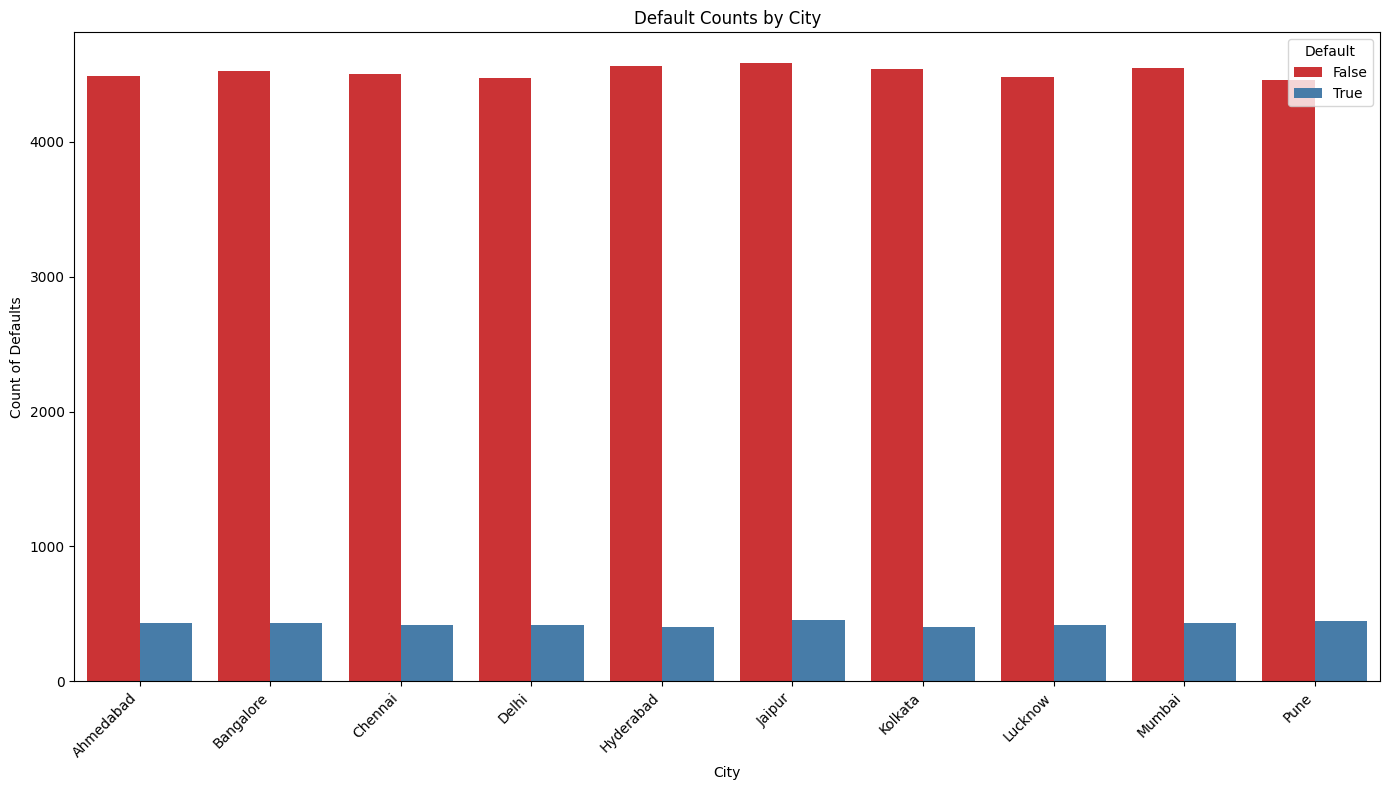

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='city', y='count', hue='default', palette='Set1')
plt.title('Default Counts by City')
plt.xlabel('City')
plt.ylabel('Count of Defaults')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Default')
plt.tight_layout()
plt.show()

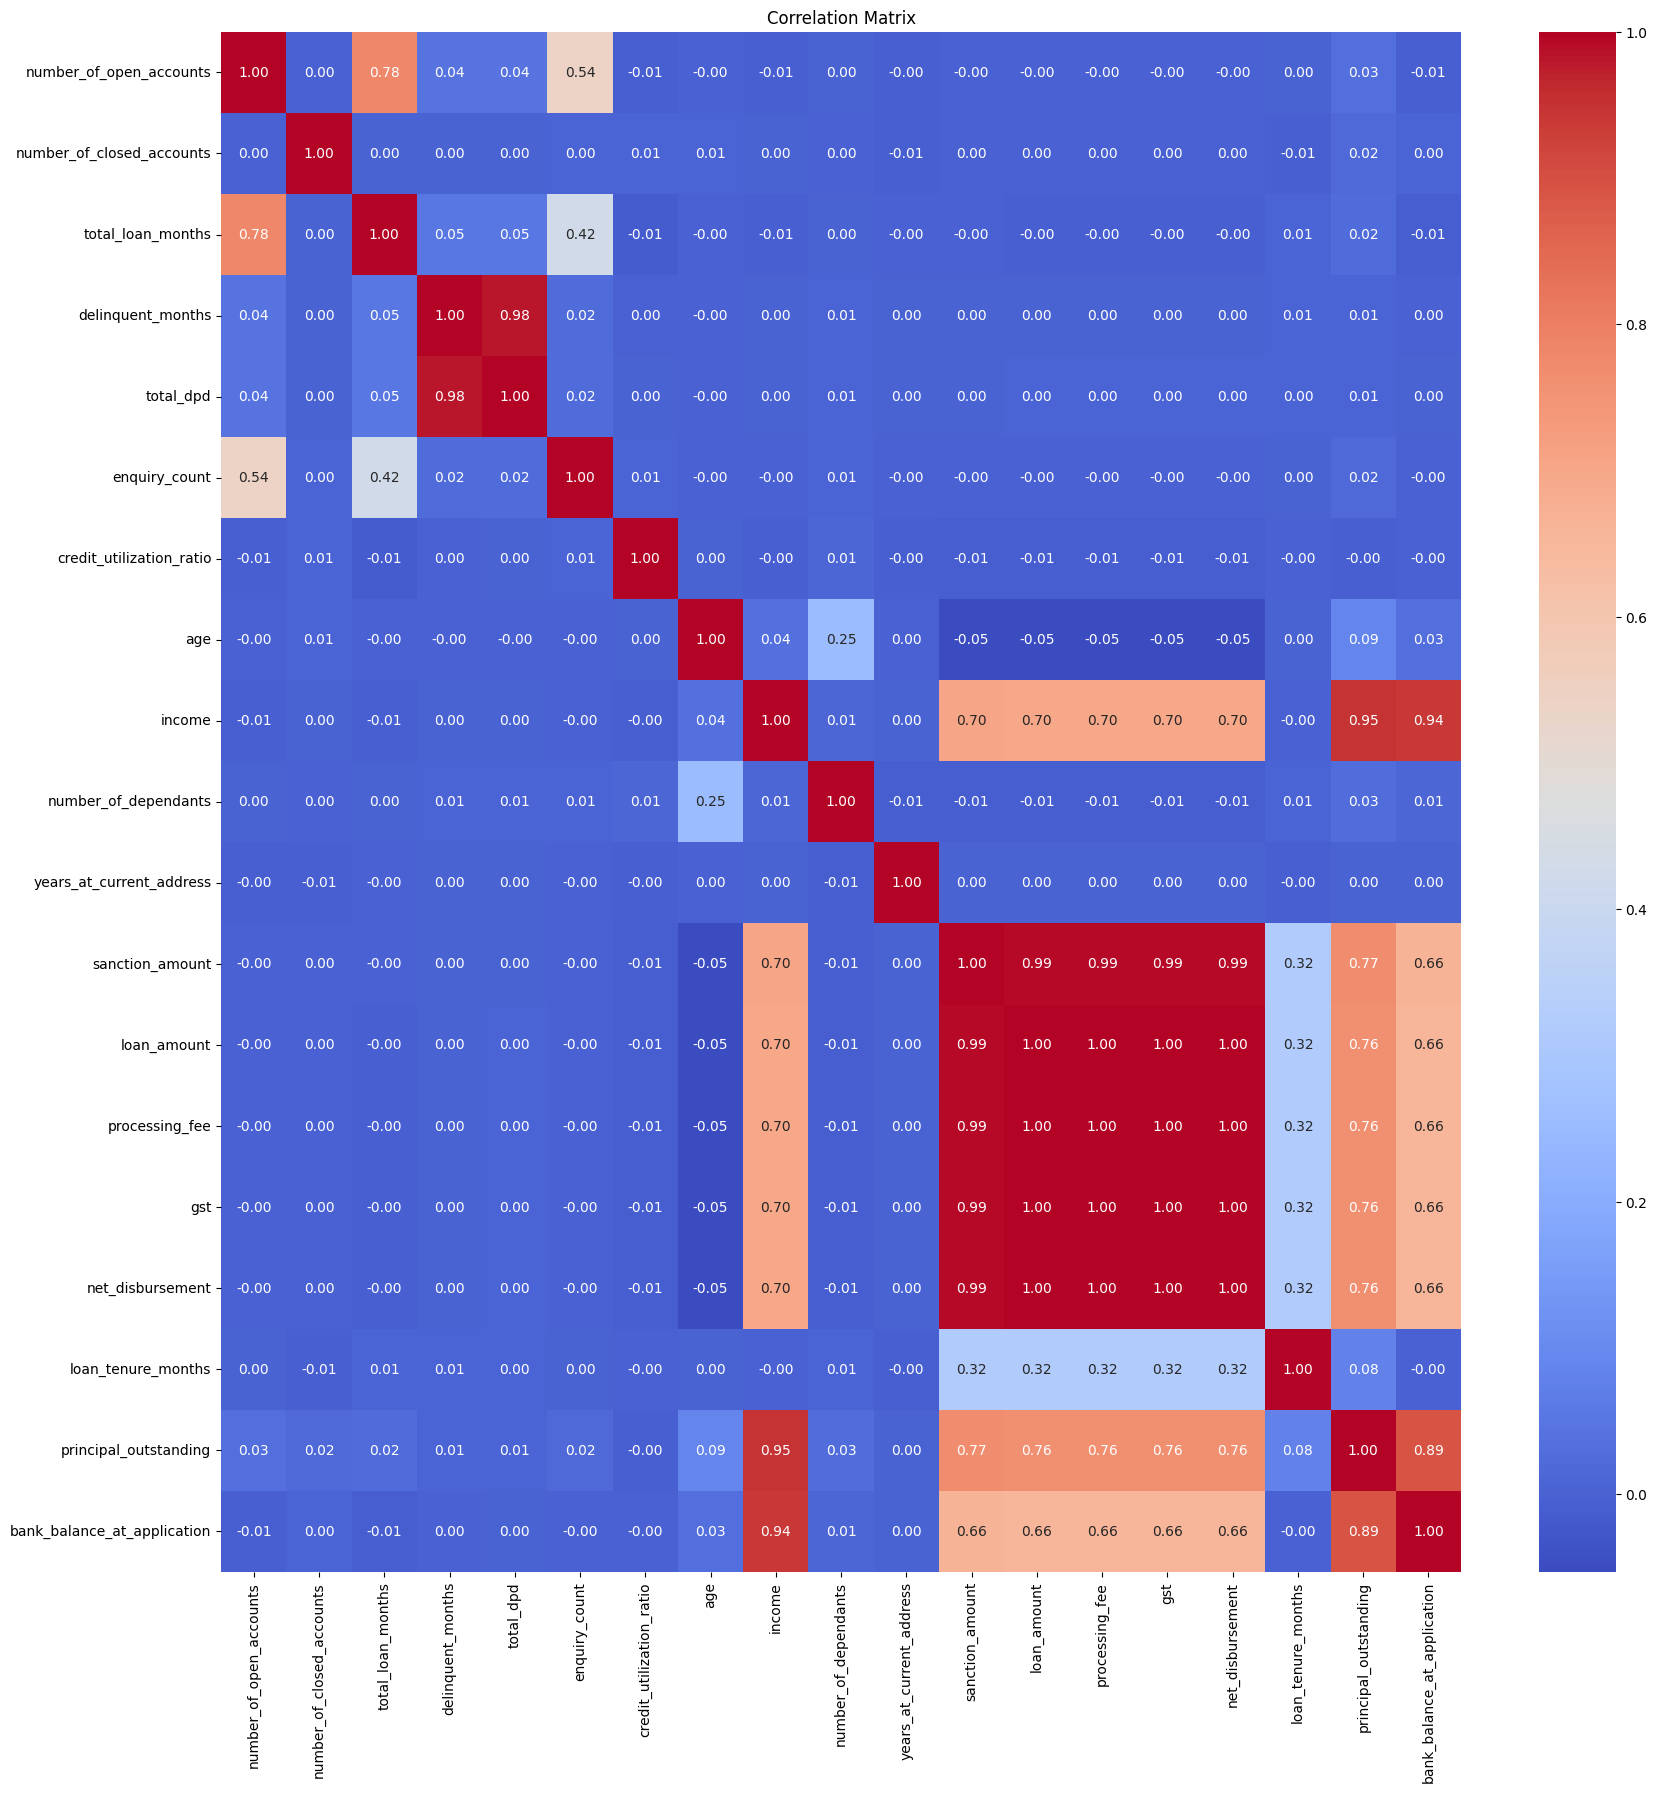

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['default'].astype(float).dtypes

dtype('float64')

Correlation with Default:

default                        1.000000
credit_utilization_ratio       0.401528
total_dpd                      0.167152
delinquent_months              0.164397
loan_tenure_months             0.121169
gst                            0.085290
net_disbursement               0.085290
processing_fee                 0.085290
loan_amount                    0.085290
sanction_amount                0.078139
number_of_closed_accounts      0.008367
years_at_current_address       0.004983
enquiry_count                 -0.004781
number_of_dependants          -0.009071
principal_outstanding         -0.011563
bank_balance_at_application   -0.017595
income                        -0.020524
age                           -0.070556
number_of_open_accounts       -0.075074
total_loan_months             -0.102367
Name: default, dtype: float64


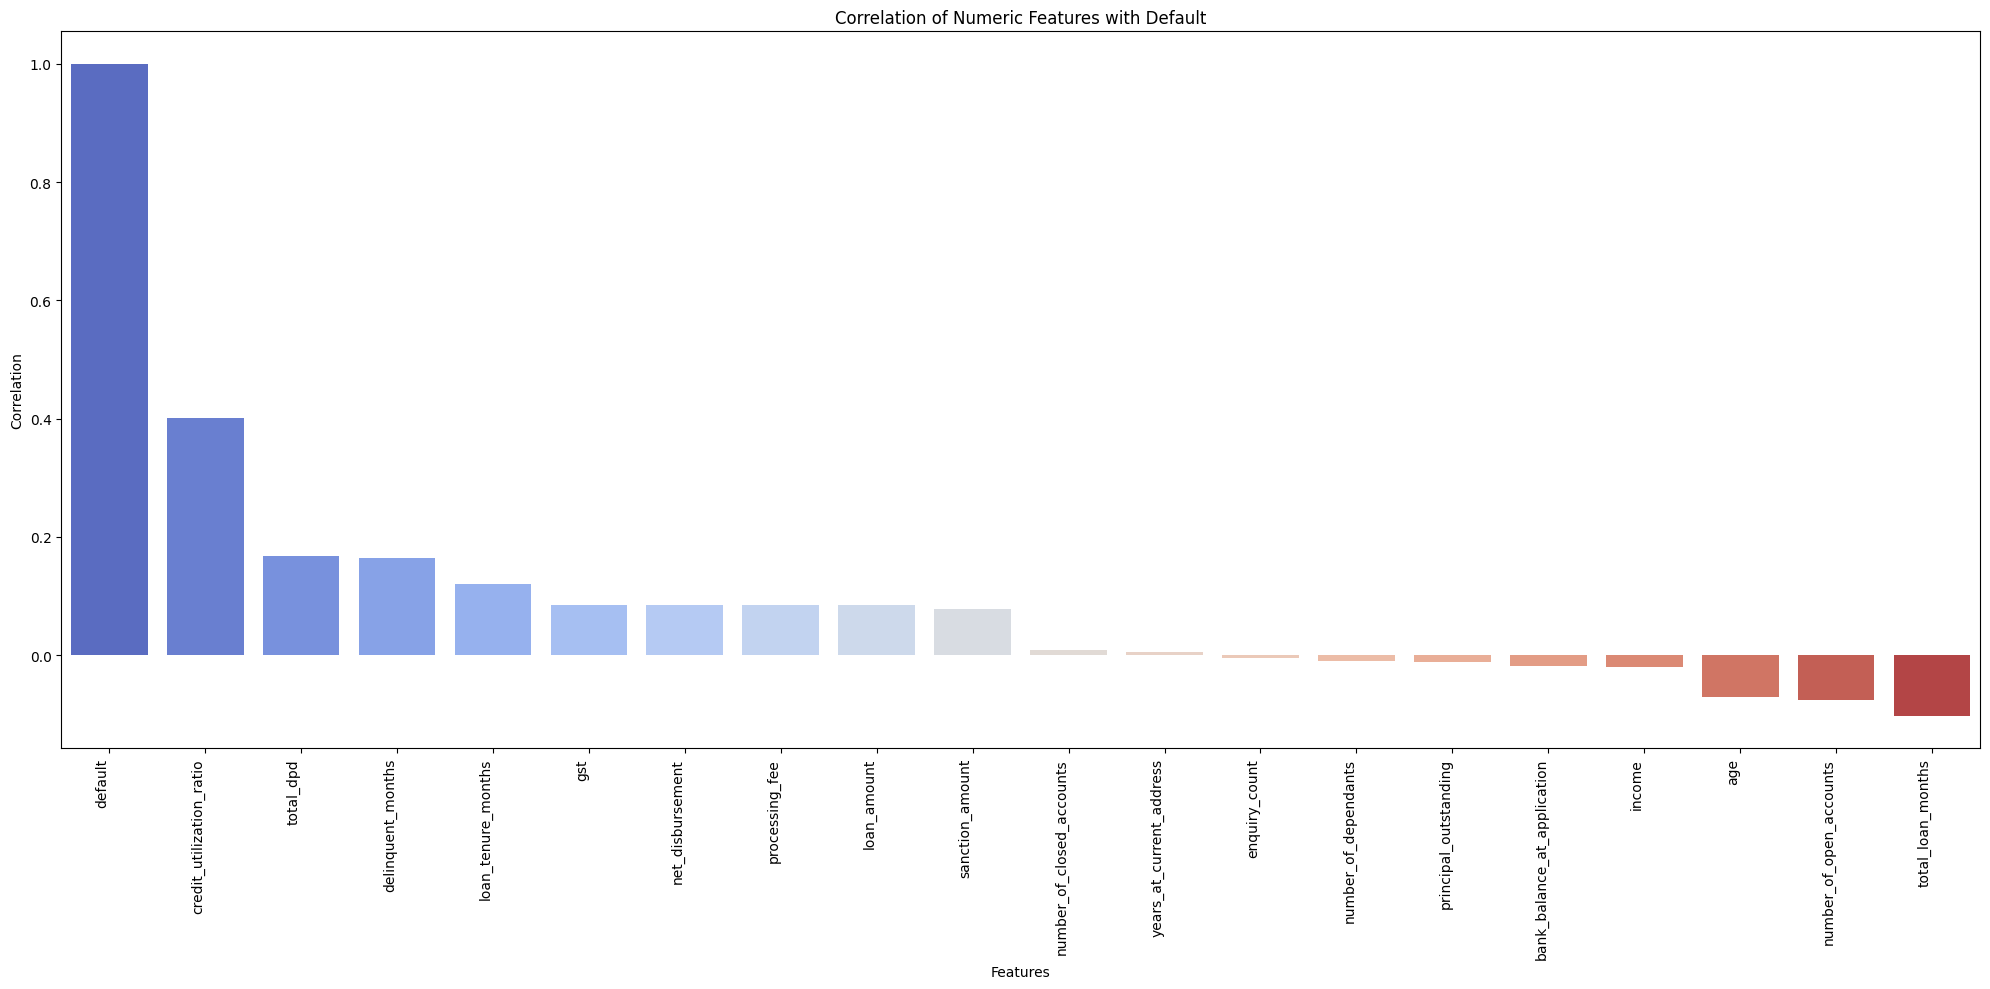

In [ ]:
df1 = df.copy()

# Ensure the target variable is numeric
df1['default'] = df1['default'].astype(float)

# Select only numeric columns
numeric_cols = df1.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Extract correlations with the target variable (default)
target_correlation = correlation_matrix['default'].sort_values(ascending=False)

# Display the correlations
print("Correlation with Default:\n")
print(target_correlation)

# Visualize the correlations
plt.figure(figsize=(20, 10))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette='coolwarm')
plt.title('Correlation of Numeric Features with Default')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [ ]:
df.shape

(49424, 32)

In [ ]:
df.to_csv('/content/cleaned_data.csv')

# **Summary**

##**Outlier Handling Process**

This outlier handling process combines technical methods and domain knowledge to ensure data integrity:

1. **IQR Method**: Used to identify and address outliers in numerical columns by calculating lower and upper bounds.

2. **Quantile-Based Filtering**: Extreme values in specific columns (e.g., income) were capped using quantile thresholds to reduce the effect of outliers.

3. **Derived Features**: Additional features like `diff` (difference between loan amount and processing fee) and `pct` (percentage of processing fee relative to loan amount) were calculated for deeper insights.

4. **Domain Knowledge Validations**:
   - GST capped at 20% of the loan amount.
   - Net disbursement should not exceed the loan amount minus GST.
   - Principal outstanding should not exceed the loan amount.
   - Bank balance at the application should be non-negative.

5. **Composite Validity Check**: Combined multiple rules into a single validity flag (`valid_loan`) to ensure overall data consistency.

6. **Final Result**:
   - Number of invalid loan records: From Derived Features: **524**, From Domain Knowlegde: **0**
   - Action: Removed them

This approach ensures that both statistical anomalies and domain-specific inconsistencies are handled effectively.


##**Univariate Analysis**

***1. Distribution of Categorical Features***

These charts provide a visual overview of the distribution of various categorical features in the loan dataset. We can see that the majority of borrowers are male and married, with most employed as salaried individuals. Owned houses are the most common residence type, and auto loans are the most frequent loan purpose. Interestingly, secured loans are significantly more popular than unsecured ones. Finally, the distribution of the target variable "default" shows that most loans were not defaulted.


***2. Distribution of Numerical Features***

This set of boxplots provides a visual representation of the distribution of various numerical features in the loan dataset. We can observe that most of the features exhibit a right-skewed distribution, indicating that a majority of the values are concentrated towards the lower end of the range. However, some features like "Loan amount" and "Processing fee" show a more uniform distribution.


##**Bivariate Analysis**

***1. Loan Amount vs Income by Default***

This scatterplot reveals a connection between loan amount and income, with larger loans generally corresponding to higher incomes. Despite this, the majority of loans, irrespective of income level, were successfully repaid. However, a significant proportion of defaults occurred at higher income levels. This suggests that factors beyond income, such as credit history or debt-to-income ratio, could significantly influence default risk.


***2. Loan Amount vs Age by Default***

This scatterplot illustrates the relationship between loan amount and age, revealing that most borrowers are between 20 and 60 years old. While older borrowers tend to take larger loans, the majority of loans, regardless of age, were not defaulted. However, a notable portion of defaults occurred among younger borrowers. This suggests that factors beyond age, such as credit history or income level, could significantly influence default risk.


***3. Age vs Income by Default***

This scatter plot shows the relationship between age and income, with different colors representing whether a loan was defaulted or not. While there is no clear trend, it appears that defaults occur across a wide range of ages and income levels.


***4. Loan Purpose vs Default***

This bar chart shows the number of loans for each purpose (auto, home, personal, education) and whether they were defaulted or not. Overall, most loans were not defaulted. However, home loans had the highest number of defaults, while auto loans had the lowest.


***5. Loan Type vs Default***

This bar chart shows the number of secured and unsecured loans, and whether they were defaulted or not. Overall, secured loans were more common and had fewer defaults compared to unsecured loans.


***6. Proportion of Defaults by Employment Status***

This heatmap shows the proportion of defaulted and non-defaulted loans for salaried and self-employed individuals. Both salaried and self-employed individuals have a high proportion of non-defaulted loans, with only a small percentage of defaults. However, salaried individuals have a slightly lower default rate compared to self-employed individuals.


***7. Proportion of Defaults by Marital Status***

This heatmap shows the proportion of defaulted and non-defaulted loans for married and single individuals. Both married and single individuals have a high proportion of non-defaulted loans, with only a small percentage of defaults. However, married individuals have a slightly lower default rate compared to single individuals.


***8. Default Counts by City***

This bar chart shows the number of defaulted and non-defaulted loans for various cities in India. All cities have a higher number of non-defaulted loans than defaulted loans. However, Mumbai has the highest number of both defaulted and non-defaulted loans.


***9. Correlation Analysis***

This correlation matrix provides a visual representation of the relationships between various numerical features. The lighter shades indicate a stronger positive correlation, while the darker shades indicate a stronger negative correlation. We can observe several interesting relationships: There is a strong positive correlation between loan amount, sanction amount, processing fee, GST, net disbursement, and principal outstanding, suggesting that these features are closely related. Income and loan amount are also positively correlated, indicating that higher income individuals tend to take larger loans.
Age and income show a moderate positive correlation, suggesting that older individuals tend to have higher incomes. Credit utilization ratio has a moderate positive correlation with delinquent months and total DPD, suggesting that higher credit utilization is associated with a higher risk of default. Overall, the correlation matrix provides valuable insights into the relationships between different features and can be used to identify potential predictors of loan default.


***10. Correlation of Numeric Features with Default***

This analysis examines how different numerical features are related to loan defaults. The results show that a high credit utilization ratio is strongly linked to an increased chance of default, while longer loan terms have the opposite effect. Interestingly, many other factors, like loan amount or credit history length, seem to have little to no bearing on default risk. To get a clearer picture, further analysis like feature importance ranking and modelling could be helpful in understanding what truly makes a loan more likely to default.
